<a href="https://colab.research.google.com/github/p3dr0id/modelo_etanol/blob/main/modelo_etanol_numerico_e_analitico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Geral (Resolução Numérica)

## Ajuste da densidade da fase líquida em função da concentração de etanol e temperatura

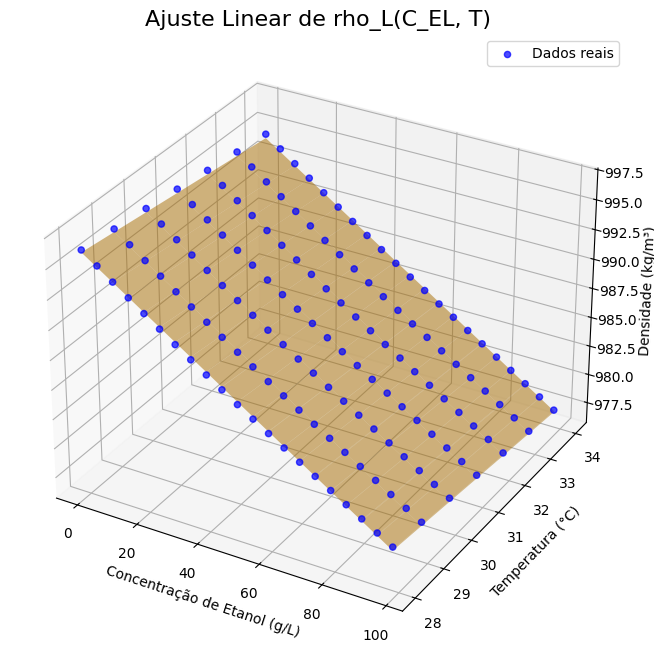

Coeficientes do ajuste:
a (C_EL): -0.1728 ± 0.0004
b (T): -0.3337 ± 0.0062
c (constante): 1005.3836 ± 0.1944
R²: 0.9992


In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dados corrigidos das tabelas
data = {
    "Temperature (°C)": [28]*21 + [29]*21 + [30]*21 + [31]*21 + [32]*21 + [33]*21 + [34]*21,
    "Density (kg/m³)": [
        996.24, 995.30, 994.35, 993.43, 992.51, 991.61, 990.71, 989.84, 988.97, 988.13,
        987.29, 986.48, 985.67, 984.87, 984.08, 983.30, 982.52, 981.74, 980.96, 980.19, 979.42,
        995.96, 995.02, 994.07, 993.15, 992.22, 991.33, 990.43, 989.55, 988.68, 987.84,
        986.99, 986.18, 985.37, 984.57, 983.78, 982.99, 982.20, 981.42, 980.63, 979.86, 979.09,
        995.68, 994.74, 993.79, 992.87, 991.94, 991.04, 990.14, 989.27, 988.39, 987.55,
        986.70, 985.89, 985.07, 984.27, 983.47, 982.68, 981.89, 981.10, 980.31, 979.53, 978.75,
        995.36, 994.41, 993.47, 992.54, 991.61, 990.71, 989.81, 988.93, 988.06, 987.21,
        986.36, 985.54, 984.73, 983.92, 983.12, 982.33, 981.54, 980.74, 979.94, 979.16, 978.37,
        995.03, 994.09, 993.14, 992.22, 991.29, 990.38, 989.48, 988.60, 987.72, 986.87,
        986.02, 985.20, 984.38, 983.58, 982.77, 981.97, 981.17, 980.37, 979.57, 978.78, 977.99,
        994.71, 993.76, 992.82, 991.89, 990.96, 990.06, 989.15, 988.27, 987.39, 986.54,
        985.69, 984.86, 984.04, 983.23, 982.42, 981.61, 980.81, 980.01, 979.20, 978.41, 977.61,
        994.38, 993.44, 992.49, 991.57, 990.64, 989.73, 988.82, 987.94, 987.05, 986.20,
        985.35, 984.52, 983.69, 982.88, 982.07, 981.26, 980.45, 979.64, 978.83, 978.03, 977.23,
    ],
    "Ethanol Concentration (g/L)": [
        0.00, 4.98, 9.94, 14.90, 19.85, 24.79, 29.72, 34.64, 39.56, 44.47,
        49.36, 54.26, 59.14, 64.02, 68.89, 73.75, 78.60, 83.45, 88.29, 93.12, 97.94,
        0.00, 4.98, 9.94, 14.90, 19.84, 24.78, 29.71, 34.63, 39.55, 44.45,
        49.35, 54.24, 59.12, 64.00, 68.86, 73.72, 78.58, 83.42, 88.26, 93.09, 97.91,
        0.00, 4.97, 9.94, 14.89, 19.84, 24.78, 29.70, 34.62, 39.54, 44.44,
        49.34, 54.22, 59.10, 63.98, 68.84, 73.70, 78.55, 83.39, 88.23, 93.06, 97.88,
        0.00, 4.97, 9.93, 14.89, 19.83, 24.77, 29.69, 34.61, 39.52, 44.42,
        49.32, 54.20, 59.08, 63.95, 68.82, 73.67, 78.52, 83.36, 88.19, 93.02, 97.84,
        0.00, 4.97, 9.93, 14.88, 19.83, 24.76, 29.68, 34.60, 39.51, 44.41,
        49.30, 54.19, 59.06, 63.93, 68.79, 73.65, 78.49, 83.33, 88.16, 92.98, 97.80,
        0.00, 4.97, 9.92, 14.88, 19.82, 24.75, 29.67, 34.59, 39.50, 44.39,
        49.28, 54.17, 59.04, 63.91, 68.77, 73.62, 78.46, 83.30, 88.13, 92.95, 97.76,
        0.00, 4.97, 9.92, 14.87, 19.81, 24.74, 29.66, 34.58, 39.48, 44.38,
        49.27, 54.15, 59.02, 63.89, 68.74, 73.59, 78.44, 83.27, 88.09, 92.91, 97.72
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função modelo linear
def linear_model(x, a, b, c):
    """
    Modelo linear: rho_L = a*C_EL + b*T + c
    """
    C_EL, T = x
    return a * C_EL + b * T + c

# Preparar os dados
C_EL = df["Ethanol Concentration (g/L)"].values
T = df["Temperature (°C)"].values
rho_L = df["Density (kg/m³)"].values

# Ajustar os dados usando o modelo linear
popt_linear, pcov_linear = opt.curve_fit(linear_model, (C_EL, T), rho_L)

# Calcular valores ajustados
rho_L_pred_linear = linear_model((C_EL, T), *popt_linear)

# Calcular coeficientes e suas incertezas
coefficients = popt_linear
uncertainties = np.sqrt(np.diag(pcov_linear))

# Calcular o coeficiente de determinação R²
residuals = rho_L - rho_L_pred_linear
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rho_L - np.mean(rho_L))**2)
r_squared = 1 - (ss_res / ss_tot)

# Gerar gráfico 3D do ajuste
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dados reais
ax.scatter(C_EL, T, rho_L, label="Dados reais", c='b', alpha=0.7)

# Dados ajustados (superfície)
T_mesh, C_EL_mesh = np.meshgrid(np.unique(T), np.unique(C_EL))
rho_L_pred_mesh = linear_model((C_EL_mesh.ravel(), T_mesh.ravel()), *popt_linear)
rho_L_pred_mesh = rho_L_pred_mesh.reshape(C_EL_mesh.shape)

ax.plot_surface(C_EL_mesh, T_mesh, rho_L_pred_mesh, color='orange', alpha=0.5)

# Configurações do gráfico
ax.set_title("Ajuste Linear de rho_L(C_EL, T)", fontsize=16)
ax.set_xlabel("Concentração de Etanol (g/L)")
ax.set_ylabel("Temperatura (°C)")
ax.set_zlabel("Densidade (kg/m³)")
ax.legend(["Dados reais"])

plt.show()

# Exibir resultados
print("Coeficientes do ajuste:")
print(f"a (C_EL): {coefficients[0]:.4f} ± {uncertainties[0]:.4f}")
print(f"b (T): {coefficients[1]:.4f} ± {uncertainties[1]:.4f}")
print(f"c (constante): {coefficients[2]:.4f} ± {uncertainties[2]:.4f}")
print(f"R²: {r_squared:.4f}")


## Resolução numérica do modelo geral

In [1]:
import sympy as sp
import scipy.optimize as opt
import pandas as pd

# Definindo as variáveis
m_TG, C_EL = sp.symbols('m_TG C_EL')
V_L, MM_E, y_C, y_E, MM_C, gamma_E, P = sp.symbols('V_L MM_E y_C y_E MM_C gamma_E P')
P_SE, P_SW, rho_L, MM_W, gamma_W = sp.symbols('P_SE P_SW rho_L MM_W gamma_W')
A_E, B_E, C_E, T = sp.symbols('A_E B_E C_E T')
A_W, B_W, C_W = sp.symbols('A_W B_W C_W')
alpha, beta, delta = sp.symbols('alpha beta delta')
a_EW, b_EW, a_WE, b_WE, c_EW, c_WE = sp.symbols('a_EW b_EW a_WE b_WE c_EW c_WE')
sigma_alpha, sigma_beta, sigma_delta, sigma_T, sigma_m_TG = sp.symbols(
    'sigma_alpha sigma_beta sigma_delta sigma_T sigma_m_TG'
)

# Cálculo de tau_EW e tau_WE
tau_EW = a_EW + b_EW / T
tau_WE = a_WE + b_WE / T

# G_EW e G_WE com o parâmetro 'c' no lugar de alpha
G_EW = sp.exp(-c_EW * tau_EW)
G_WE = sp.exp(-c_WE * tau_WE)

# Equações de Antoine (logaritmo natural)
P_SE = sp.exp(A_E - B_E/(C_E + T))
P_SW = sp.exp(A_W - B_W/(C_W + T))

# Densidade do líquido (mistura alcoolica)
rho_L = alpha * C_EL + beta * T + delta

# Frações molares x_E e x_W
x_E = C_EL / MM_E / (C_EL / MM_E + (rho_L - C_EL) / MM_W)
x_W = 1 - x_E

# Coeficiente de Atividade para Etanol (gamma_E)
ln_gamma_E = x_W**2 * (tau_WE * (G_WE / (x_E + x_W * G_WE))**2 + tau_EW * G_EW / (x_W + x_E * G_EW)**2)
gamma_E = sp.exp(ln_gamma_E)

# Coeficiente de Atividade para Água (gamma_W)
ln_gamma_W = x_E**2 * (tau_EW * (G_EW / (x_W + x_E * G_EW))**2 + tau_WE * G_WE / (x_E + x_W * G_WE)**2)
gamma_W = sp.exp(ln_gamma_W)

# Lei de Raoult modificada para y_E e y_W
y_E = x_E * gamma_E * P_SE / P
y_W = x_W * gamma_W * P_SW / P

# Expressão para y_C
y_C = 1 - y_E - y_W

# Número total de mols de gás
n_EL = C_EL * V_L / MM_E
n_TG = n_EL / (y_C - y_E)

# Expressão para m_TG
m_TG_expr = n_TG * (y_E * MM_E + y_W * MM_W + y_C * MM_C)

# Função implícita f(C_EL, ...) = 0
f = m_TG_expr - m_TG

# Derivadas implícitas para propagação de incertezas
partials = {
    "alpha": -sp.diff(f, alpha) / sp.diff(f, C_EL),
    "beta": -sp.diff(f, beta) / sp.diff(f, C_EL),
    "delta": -sp.diff(f, delta) / sp.diff(f, C_EL),
    "T": -sp.diff(f, T) / sp.diff(f, C_EL),
    "m_TG": -sp.diff(f, m_TG) / sp.diff(f, C_EL),
}

# Propagação de incertezas
uncertainties = (
    (partials["alpha"] * sigma_alpha)**2 +
    (partials["beta"] * sigma_beta)**2 +
    (partials["delta"] * sigma_delta)**2 +
    (partials["T"] * sigma_T)**2 +
    (partials["m_TG"] * sigma_m_TG)**2
)
sigma_C_EL = sp.sqrt(uncertainties)

# Parâmetros e incertezas no formato de dicionário
parameters = {
    "A_E": 16.8958, "B_E": 3795.17, "C_E": 230.918, # Constantes de Antoine para o etanol
    "A_W": 16.3872, "B_W": 3885.70, "C_W": 230.170, # Constantes de Antoine para a água
    "alpha": -0.1728, "beta": -0.3337, "delta": 1005.3836,  # Coeficientes obtidos por ajuste para a densidade do líquido (rho_L = alpha * C_EL + beta * T + delta)
    "a_EW": -0.8009, "b_EW": 246.18, # Obtidos pelo modelo NRTL
    "a_WE": 3.4578, "b_WE": -586.0809, # Obtidos pelo modelo NRTL
    #"a_EW": 0, "b_EW": 0, # Caso particular: gamma_E = gamma_W = 1 (ideal)
    #"a_WE": 0, "b_WE": 0, # Caso particular: gamma_E = gamma_W = 1 (ideal)
    "c_EW": 0.3, "c_WE": 0.3, # Obtidos pelo modelo NRTL
    "V_L": 0.03, # Volume do líquido (L)
    "MM_E": 46.07, "MM_W": 18.01528, "MM_C": 44.01, # Massas molares do etanol, água e CO2, respectivamente (g/mol)
    "P": 101.325, # Pressão (kPa)
    "sigma_alpha": 0.004, "sigma_beta": 0.006, "sigma_delta": 0.2, # Incertezas dos coeficientes para a densidade (obtidos por ajuste)
    "sigma_T": 0.5, # Incerteza associada a medida de temperatura (ºC)
    "sigma_m_TG": 0.0001 # Incerteza associada a medida de massa (g)
}

# Função para calcular m_TG numericamente
def calcular_m_TG(C_EL_val, T_val, parameters):
    subs = {C_EL: C_EL_val, T: T_val}
    subs.update(parameters)  # Substituir parâmetros numéricos
    # Retornar o valor numérico
    return float(m_TG_expr.subs(subs))

# Função para calcular a incerteza propagada em C_EL
def calcular_incerteza_C_EL(C_EL_val, m_TG_val, T_val, parameters):
    # Criar o dicionário de substituições
    subs = {C_EL: C_EL_val, m_TG: m_TG_val, T: T_val}
    subs.update(parameters)  # Adicionar os parâmetros diretamente
    # Retornar o valor numérico
    return float(sigma_C_EL.subs(subs))

# Função para encontrar uma solução de C_EL
def encontrar_solucao_C_EL(m_TG_val, T_val, parameters, max_val=150):
    func = lambda C_EL_val: calcular_m_TG(C_EL_val, T_val, parameters) - m_TG_val
    sol = opt.root_scalar(func, bracket=[0, max_val], method='brentq')
    if sol.converged:
        return sol.root
    else:
        raise ValueError(f"Não foi possível encontrar uma solução para m_TG = {m_TG_val}, T = {T_val}")

# Faixas de massas e temperaturas
m_TG_vals = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
T_vals = [28, 29, 30, 31, 32, 33, 34]

# Lista para armazenar os resultados
results = []

# Loop sobre temperaturas e massas
for T_val in T_vals:
    for m_TG_val in m_TG_vals:
        try:
            C_EL_solution = encontrar_solucao_C_EL(m_TG_val, T_val, parameters)
            sigma_C_EL_val = calcular_incerteza_C_EL(C_EL_solution, m_TG_val, T_val, parameters)
            results.append({
                "temperatura (°C)": T_val,
                "massa (g)": m_TG_val,
                "C_EL (g/L)": C_EL_solution,
                "sigma_C_EL (g/L)": sigma_C_EL_val
            })
        except ValueError as e:
            print(f"Erro ao calcular para T = {T_val} °C e m_TG = {m_TG_val} g: {e}")

# Criar DataFrame com os resultados
df_results = pd.DataFrame(results)

# Exibir os resultados
df_results


,temperatura (°C),massa (g),C_EL (g/L),sigma_C_EL (g/L)
0,28,0.5,17.174450,0.008815
1,28,1.0,34.352841,0.016479
2,28,1.5,51.535342,0.024236
3,28,2.0,68.722131,0.031921
4,28,2.5,85.913396,0.039494
5,28,3.0,103.109337,0.046935
6,29,0.5,17.157775,0.009223
7,29,1.0,34.319737,0.017338
8,29,1.5,51.486064,0.025530
9,29,2.0,68.656946,0.033639


# Modelo Analítico (Simplificado)

-------------------------------------
Equação para massa total de gás m_TG:
-------------------------------------


C_EL*V_L*(C_EL*gamma_E*exp(A_E - B_E/(C_E + T))/(P*(C_EL/MM_E + (C_EL*alpha - C_EL + T*beta + delta)/MM_W)) + MM_C*(-C_EL*gamma_E*exp(A_E - B_E/(C_E + T))/(MM_E*P*(C_EL/MM_E + (C_EL*alpha - C_EL + T*beta + delta)/MM_W)) + 1 - gamma_W*(-C_EL/(MM_E*(C_EL/MM_E + (C_EL*alpha - C_EL + T*beta + delta)/MM_W)) + 1)*exp(A_W - B_W/(C_W + T))/P) + MM_W*gamma_W*(-C_EL/(MM_E*(C_EL/MM_E + (C_EL*alpha - C_EL + T*beta + delta)/MM_W)) + 1)*exp(A_W - B_W/(C_W + T))/P)/(MM_E*(-2*C_EL*gamma_E*exp(A_E - B_E/(C_E + T))/(MM_E*P*(C_EL/MM_E + (C_EL*alpha - C_EL + T*beta + delta)/MM_W)) + 1 - gamma_W*(-C_EL/(MM_E*(C_EL/MM_E + (C_EL*alpha - C_EL + T*beta + delta)/MM_W)) + 1)*exp(A_W - B_W/(C_W + T))/P))

-------------------------------------------------------------
Resolvendo a equação para obter a concentração de etanol C_EL
-------------------------------------------------------------
--------------------------------------------------------
Número de soluções para concentração de etanol C_EL: 2
--------------------------------------------------------
Solução 1:


-MM_E*(MM_C*P*T*V_L*beta*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_C*P*V_L*delta*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) - MM_C*T*V_L*beta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_C*V_L*delta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_E*P*alpha*m_TG*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_E*P*m_TG*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_E*alpha*gamma_W*m_TG*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_E*gamma_W*m_TG*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_W*P*m_TG*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_W*T*V_L*beta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) + MM_W*V_L*delta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) + 2*MM_W*gamma_E*m_TG*exp((A_E*(C_W + T) + B_W)/(C_W + T)) - sqrt(MM_C**2*P**2*T**2*V_L**2*beta**2*exp(2*(B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + 2*MM_C**2*P**2*T*V_L**2*beta*delta*exp(2*(B_E*(C_W + T) + B_W*(C_E + T))/((C_E + 

Solução 2:


-MM_E*(MM_C*P*T*V_L*beta*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_C*P*V_L*delta*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) - MM_C*T*V_L*beta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_C*V_L*delta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_E*P*alpha*m_TG*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_E*P*m_TG*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_E*alpha*gamma_W*m_TG*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_E*gamma_W*m_TG*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - MM_W*P*m_TG*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_W*T*V_L*beta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) + MM_W*V_L*delta*gamma_W*exp((A_W*(C_E + T) + B_E)/(C_E + T)) + 2*MM_W*gamma_E*m_TG*exp((A_E*(C_W + T) + B_W)/(C_W + T)) + sqrt(MM_C**2*P**2*T**2*V_L**2*beta**2*exp(2*(B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + 2*MM_C**2*P**2*T*V_L**2*beta*delta*exp(2*(B_E*(C_W + T) + B_W*(C_E + T))/((C_E + 

----------------------------------------------------
Realizando a avaliação numérica da solução analítica
----------------------------------------------------
----------------------------------------------------
Obtendo a solução numérica via Bhaskara
----------------------------------------------------


(-MM_E*V_L*(T*beta + delta)*(MM_C*P*exp(B_W/(C_W + T)) - MM_C*gamma_W*exp(A_W) + MM_W*gamma_W*exp(A_W))*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))) + MM_E*m_TG*(-MM_E*gamma_W*(alpha - 1)*exp((A_W*(C_E + T) + B_E)/(C_E + T)) - 2*MM_W*gamma_E*exp((A_E*(C_W + T) + B_W)/(C_W + T)) + P*(MM_E*(alpha - 1) + MM_W)*exp((B_E*(C_W + T) + B_W*(C_E + T))/((C_E + T)*(C_W + T))))*exp(B_W/(C_W + T)) + sqrt(MM_E**2*(4*V_L*m_TG*(P*exp(B_W/(C_W + T)) - gamma_W*exp(A_W))*(T*beta + delta)*(MM_C*P*(MM_E*(alpha - 1) + MM_W)*exp(B_E/(C_E + T) + B_W/(C_W + T)) + MM_E*gamma_W*(-MM_C + MM_W)*(alpha - 1)*exp(A_W + B_E/(C_E + T)) + MM_W*gamma_E*(-MM_C + MM_E)*exp(A_E + B_W/(C_W + T)))*exp(B_E/(C_E + T)) + (-V_L*(T*beta + delta)*(MM_C*P*exp(B_W/(C_W + T)) - MM_C*gamma_W*exp(A_W) + MM_W*gamma_W*exp(A_W))*exp(B_E/(C_E + T)) + m_TG*(-MM_E*gamma_W*(alpha - 1)*exp(A_W + B_E/(C_E + T)) - 2*MM_W*gamma_E*exp(A_E + B_W/(C_W + T)) + P*(MM_E*(alpha - 1) + MM_W)*exp(B_E/(C_E + T) + B_W/(C_W + T))))**2)*exp(-2*B_

-----------------
Plotando gráficos
-----------------


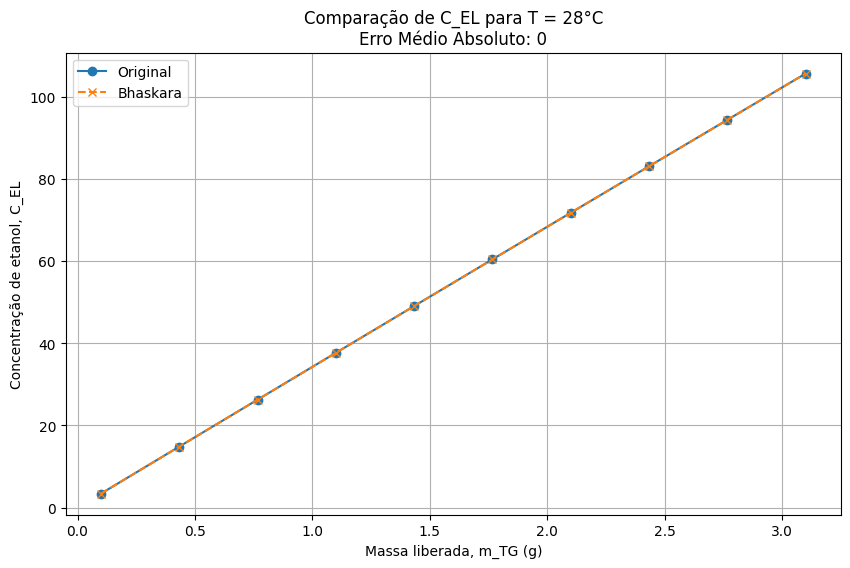

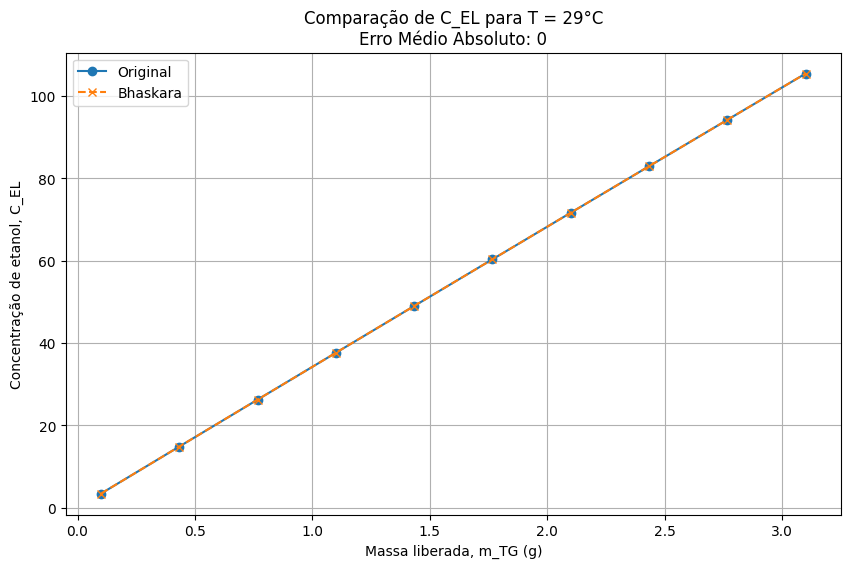

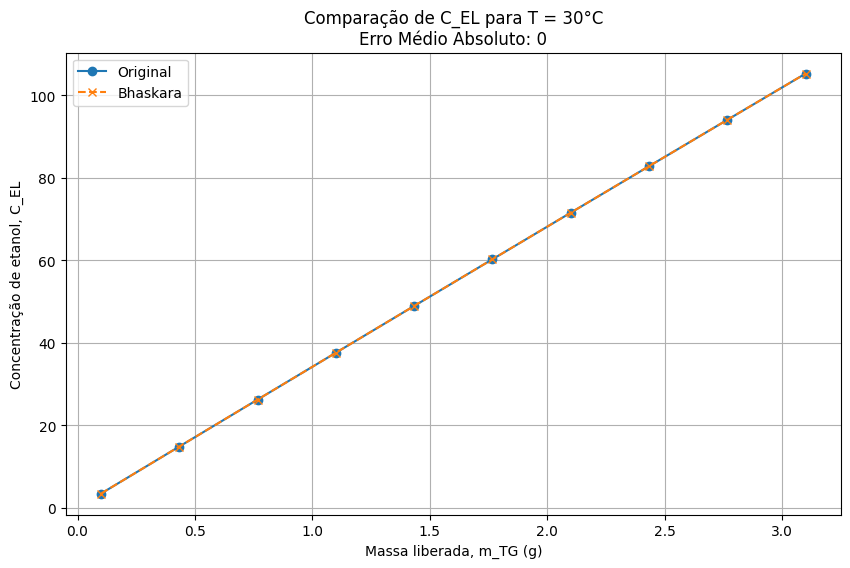

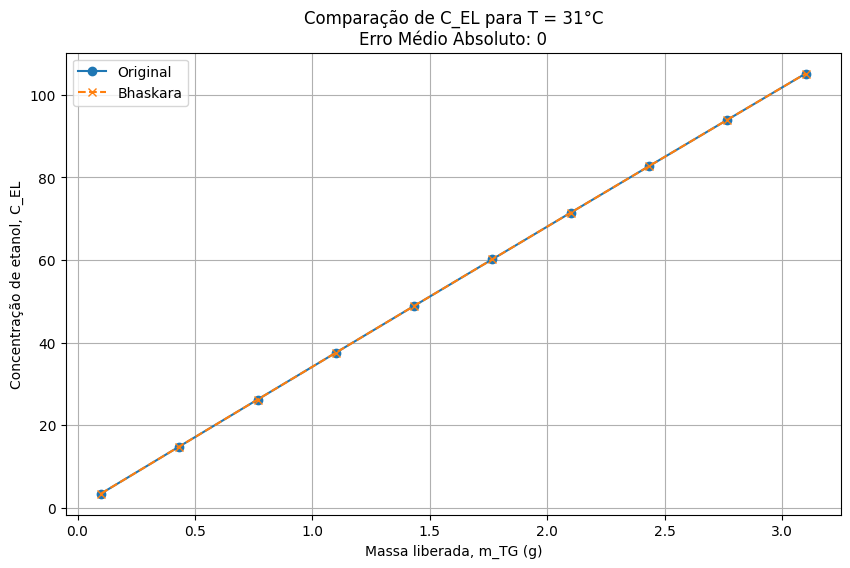

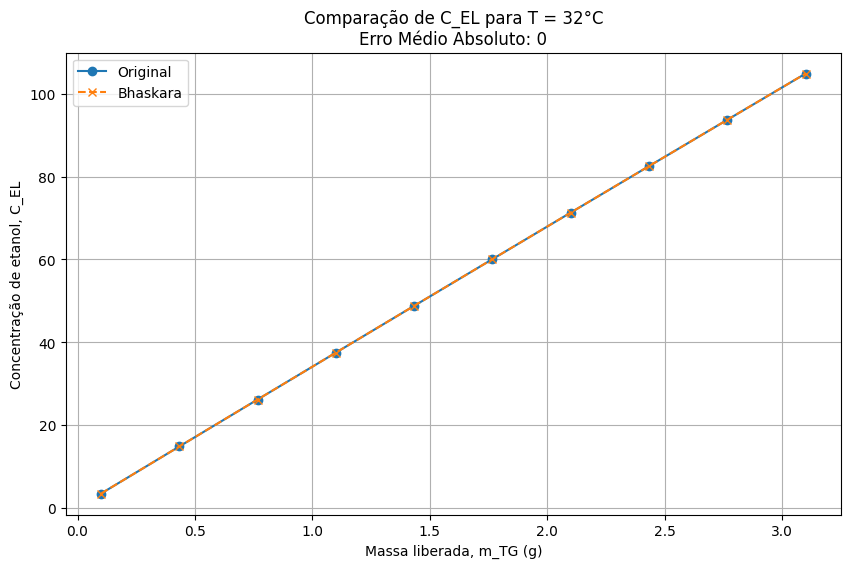

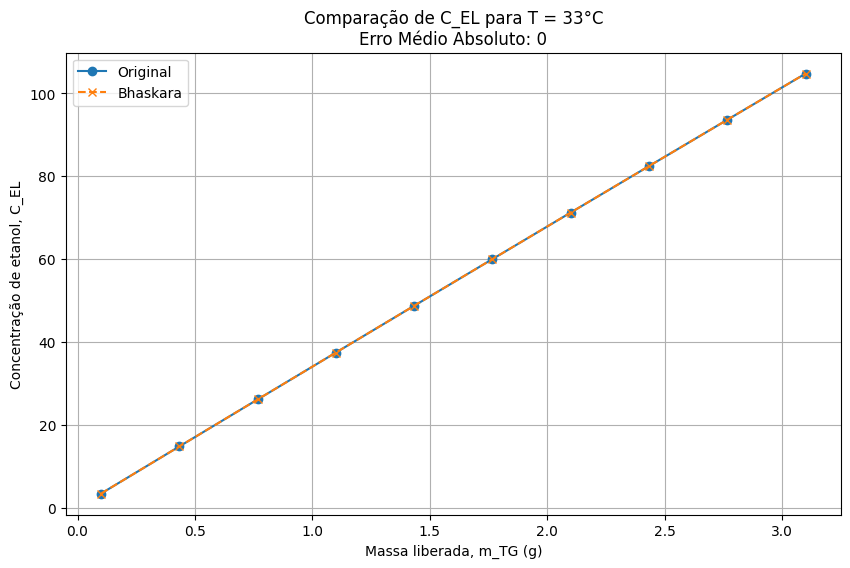

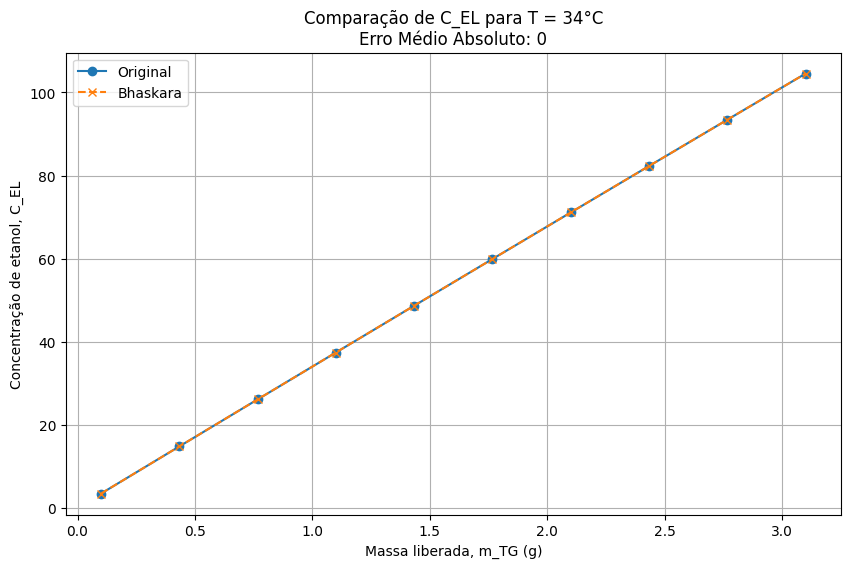

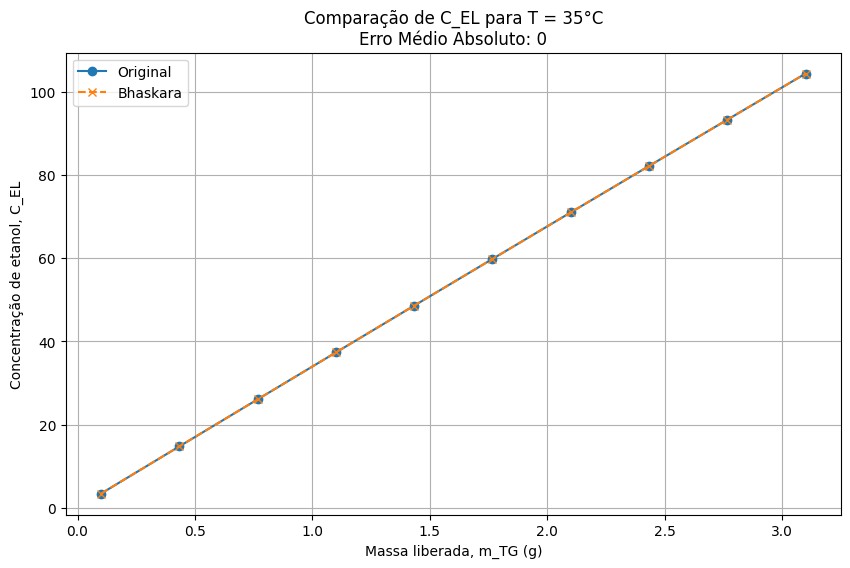

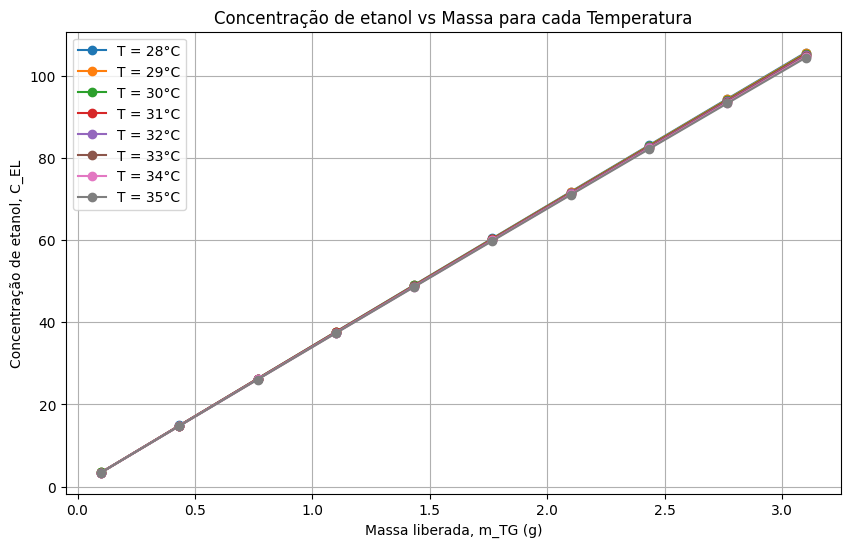

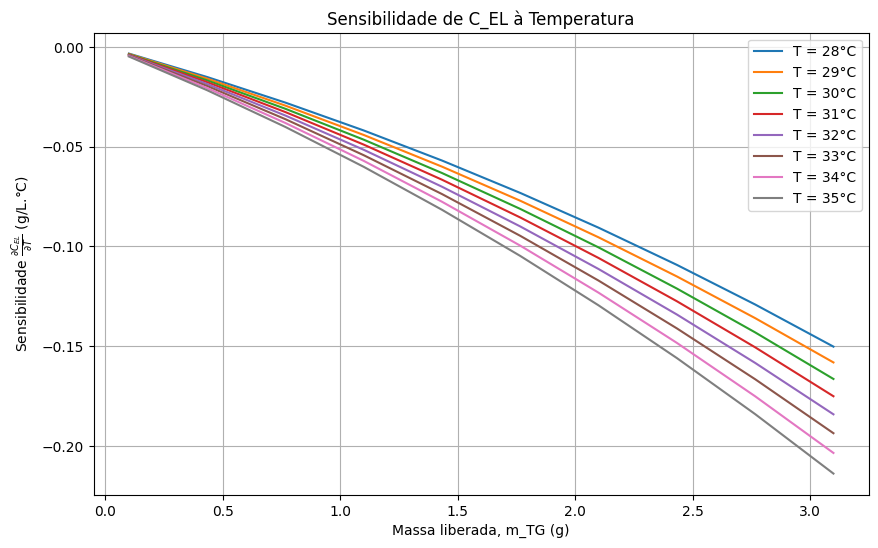

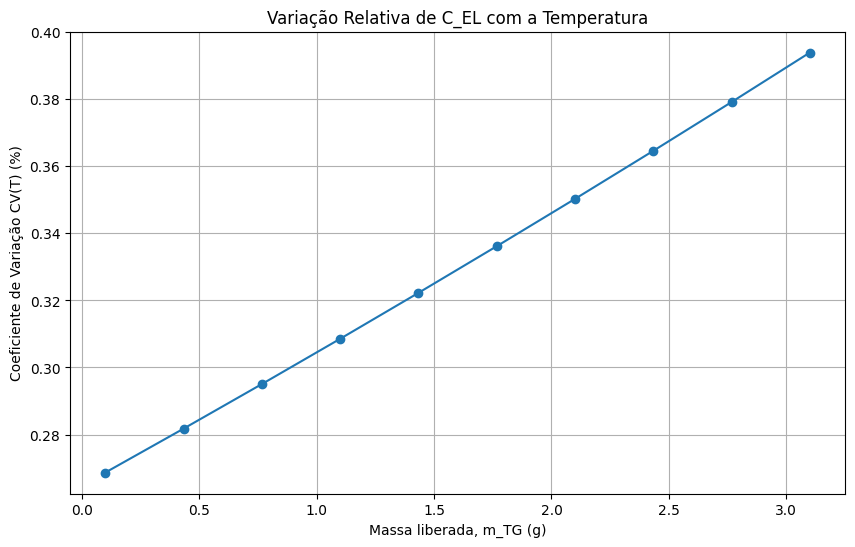

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


# Definindo as variáveis
m_TG, C_EL = sp.symbols('m_TG C_EL')
V_L, MM_E, y_C, y_E, MM_C, gamma_E, P = sp.symbols('V_L MM_E y_C y_E MM_C gamma_E P')
P_SE, P_SW, rho_L, MM_W, gamma_W = sp.symbols('P_SE P_SW rho_L MM_W gamma_W')
A_E, B_E, C_E, T = sp.symbols('A_E B_E C_E T')
A_W, B_W, C_W = sp.symbols('A_W B_W C_W')
alpha, beta, delta = sp.symbols('alpha beta delta')

# Equações de Antoine (logaritmo natural)
P_SE = sp.exp(A_E - B_E/(C_E + T))
P_SW = sp.exp(A_W - B_W/(C_W + T))

# Densidade do líquido (mistura alcoolica)
rho_L = alpha * C_EL + beta * T + delta

# Frações molares x_E e x_W
x_E = C_EL / MM_E / (C_EL / MM_E + (rho_L - C_EL) / MM_W)
x_W = 1 - x_E

# Lei de Raoult modificada para y_E e y_W
y_E = x_E * gamma_E * P_SE / P
y_W = x_W * gamma_W * P_SW / P

# Expressão para y_C
y_C = 1 - y_E - y_W

# Número total de mols de gás
n_EL = C_EL * V_L / MM_E
n_TG = n_EL / (y_C - y_E)

# Expressão para m_TG
m_TG_expr = n_TG * (y_E * MM_E + y_W * MM_W + y_C * MM_C)
print("-------------------------------------")
print("Equação para massa total de gás m_TG:")
print("-------------------------------------")
display(m_TG_expr)

# Simplifique a equação antes de resolvê-la
m_TG_simple = m_TG_expr.factor()

# Resolvendo a equação para C_EL
print("-------------------------------------------------------------")
print("Resolvendo a equação para obter a concentração de etanol C_EL")
print("-------------------------------------------------------------")
C_EL_solution = sp.solve(sp.Eq(m_TG, m_TG_simple), C_EL)
print("--------------------------------------------------------")
print(f"Número de soluções para concentração de etanol C_EL: {len(C_EL_solution)}")
print("--------------------------------------------------------")
print("Solução 1:")
display(sp.simplify(C_EL_solution[0]))
print("Solução 2:")
display(sp.simplify(C_EL_solution[1]))


# ------------------------------------------------------------
# Funções para avaliação numérica e plots
# ------------------------------------------------------------

def evaluate_numerical_solution(C_EL_expr, param_values, mass_values, temperature_values):
    """
    Avaliação numérica da solução analítica:

    - Calcula a derivada parcial de C_EL em relação à temperatura.
    - Cria matrizes para armazenar os valores de C_EL e de sua derivada para cada
      combinação de massa e temperatura.
    - Calcula o Coeficiente de Variação CV(T) para cada massa fixa.

    Retorna:
        C_EL_matrix: matriz com os valores de C_EL.
        C_EL_derivative_matrix: matriz com os valores da derivada ∂C_EL/∂T.
        CV_matrix: vetor com o coeficiente de variação para cada massa.
    """
    # Cálculo da derivada parcial de C_EL em relação à temperatura simbolicamente
    C_EL_derivative_T = sp.diff(C_EL_expr, T)

    # Criando a matriz para armazenar os valores de C_EL
    C_EL_matrix = np.zeros((len(temperature_values), len(mass_values)))

    # Matrizes para armazenar os valores da derivada e do coeficiente de variação
    C_EL_derivative_matrix = np.zeros((len(temperature_values), len(mass_values)))
    CV_matrix = np.zeros(len(mass_values))

    # Dicionário para armazenar valores de C_EL para cada massa
    C_EL_values_per_mass = {m_val: [] for m_val in mass_values}

    # Calculando os valores de C_EL e sua derivada para cada combinação de temperatura e massa
    for i, T_val in enumerate(temperature_values):
        for j, m_val in enumerate(mass_values):
            # Substituir valores numéricos e calcular C_EL e derivada
            subs_dict = {**param_values, m_TG: m_val, T: T_val}
            C_EL_value = C_EL_expr.evalf(subs=subs_dict)
            C_EL_deriv_value = C_EL_derivative_T.evalf(subs=subs_dict)

            # Armazenando valores nas matrizes
            C_EL_matrix[i, j] = float(C_EL_value)
            C_EL_derivative_matrix[i, j] = float(C_EL_deriv_value)
            C_EL_values_per_mass[m_val].append(float(C_EL_value))

    # Cálculo do Coeficiente de Variação CV(T) para cada massa fixa
    for j, m_val in enumerate(mass_values):
        mean_C_EL = np.mean(C_EL_values_per_mass[m_val])
        std_C_EL = np.std(C_EL_values_per_mass[m_val])
        CV_matrix[j] = (std_C_EL / mean_C_EL) * 100 if mean_C_EL != 0 else 0

    return C_EL_matrix, C_EL_derivative_matrix, CV_matrix

def plot_concentration_vs_mass(temperature_values, mass_values, C_EL_matrix):
    """
    Gráfico da Concentração de Etanol (C_EL) em função da Massa liberada (m_TG)
    para cada temperatura.
    """
    plt.figure(figsize=(10, 6))
    for i, T_val in enumerate(temperature_values):
        plt.plot(mass_values, C_EL_matrix[i, :], marker='o', linestyle='-', label=f"T = {T_val}°C")

    plt.xlabel("Massa liberada, m_TG (g)")
    plt.ylabel("Concentração de etanol, C_EL")
    plt.title("Concentração de etanol vs Massa para cada Temperatura")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"concentracao_vs_massa.png", format="png", dpi=300)
    plt.show()

def plot_sensitivity(temperature_values, mass_values, C_EL_derivative_matrix):
    """
    Gráfico da Sensibilidade: Derivada Parcial de C_EL em relação à Temperatura.
    """
    plt.figure(figsize=(10, 6))
    for i, T_val in enumerate(temperature_values):
        plt.plot(mass_values, C_EL_derivative_matrix[i, :], label=f"T = {T_val}°C")

    plt.xlabel("Massa liberada, m_TG (g)")
    plt.ylabel(r"Sensibilidade $\frac{\partial C_{EL}}{\partial T}$ (g/L.°C)")
    plt.title("Sensibilidade de C_EL à Temperatura")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"sensibilidade.png", format="png", dpi=300)
    plt.show()

def plot_CV(mass_values, CV_matrix):
    """
    Gráfico do Coeficiente de Variação CV(T).
    """
    plt.figure(figsize=(10, 6))
    plt.plot(mass_values, CV_matrix, marker='o', linestyle='-')

    plt.xlabel("Massa liberada, m_TG (g)")
    plt.ylabel("Coeficiente de Variação CV(T) (%)")
    plt.title("Variação Relativa de C_EL com a Temperatura")
    plt.grid(True)
    plt.savefig(f"coef_variacao.png", format="png", dpi=300)
    plt.show()


# ------------------------------------------------------------
# Novas funções para resolução via Bhaskara e comparação de soluções
# ------------------------------------------------------------

def solve_C_EL_bhaskara():
    """
    Constrói simbolicamente os coeficientes a, b e c da equação quadrática
    e resolve por Bhaskara, retornando a solução positiva para C_EL.
    """
    a_expr = V_L * (
        MM_C*MM_E*P*(alpha - 1)
        - MM_C*MM_E*gamma_W*sp.exp(A_W)*sp.exp(-B_W/(C_W+T))*(alpha - 1)
        + MM_C*MM_W*P
        - MM_C*MM_W*gamma_E*sp.exp(A_E)*sp.exp(-B_E/(C_E+T))
        + MM_E*MM_W*gamma_W*sp.exp(A_W)*sp.exp(-B_W/(C_W+T))*(alpha - 1)
        + MM_E*MM_W*gamma_E*sp.exp(A_E)*sp.exp(-B_E/(C_E+T))
    )

    b_expr = V_L * (
        MM_C*MM_E*P*(T*beta + delta)
        - MM_C*MM_E*gamma_W*sp.exp(A_W)*sp.exp(-B_W/(C_W+T))*(T*beta + delta)
        + MM_E*MM_W*gamma_W*sp.exp(A_W)*sp.exp(-B_W/(C_W+T))*(T*beta + delta)
    ) - m_TG*MM_E*(
        MM_E*P*(alpha - 1)
        - MM_E*gamma_W*sp.exp(A_W)*sp.exp(-B_W/(C_W+T))*(alpha - 1)
        + MM_W*P
        - 2*MM_W*gamma_E*sp.exp(A_E)*sp.exp(-B_E/(C_E+T))
    )

    c_expr = - m_TG*MM_E*(
        MM_E*P*(T*beta + delta)
        - MM_E*gamma_W*sp.exp(A_W)*sp.exp(-B_W/(C_W+T))*(T*beta + delta)
    )

    # Fórmula de Bhaskara (utilizando o sinal positivo para obter a solução desejada)
    C_EL_bhaskara_expr = (-b_expr + sp.sqrt(b_expr**2 - 4*a_expr*c_expr))/(2*a_expr)
    return sp.simplify(C_EL_bhaskara_expr)

def evaluate_bhaskara_solution(C_EL_bhaskara_expr, param_values, mass_values, temperature_values):
    """
    Avalia numericamente a solução de C_EL obtida via Bhaskara para cada combinação
    de massa e temperatura.

    Retorna:
        C_EL_bhaskara_matrix: matriz com os valores de C_EL (via Bhaskara).
    """
    C_EL_bhaskara_matrix = np.zeros((len(temperature_values), len(mass_values)))

    for i, T_val in enumerate(temperature_values):
        for j, m_val in enumerate(mass_values):
            subs_dict = {**param_values, m_TG: m_val, T: T_val}
            value = C_EL_bhaskara_expr.evalf(subs=subs_dict)
            C_EL_bhaskara_matrix[i, j] = float(value)

    return C_EL_bhaskara_matrix

def plot_comparison(temperature_values, mass_values, original_matrix, bhaskara_matrix):
    """
    Para cada temperatura, plota um gráfico comparando a solução original para C_EL
    e a solução obtida via Bhaskara. Em cada gráfico, exibe uma métrica (erro médio absoluto)
    que avalia numericamente quão próximas as curvas estão.
    """
    for i, T_val in enumerate(temperature_values):
        # Extraindo os valores para a temperatura atual
        orig = original_matrix[i, :]
        bhask = bhaskara_matrix[i, :]

        # Calculando a métrica: erro médio absoluto (MAE)
        mae = np.mean(np.abs(orig - bhask))

        # Plotando o gráfico para a temperatura atual
        plt.figure(figsize=(10, 6))
        plt.plot(mass_values, orig, marker='o', linestyle='-', label="Original")
        plt.plot(mass_values, bhask, marker='x', linestyle='--', label="Bhaskara")
        plt.xlabel("Massa liberada, m_TG (g)")
        plt.ylabel("Concentração de etanol, C_EL")
        plt.title(f"Comparação de C_EL para T = {T_val}°C\nErro Médio Absoluto: {mae:.4g}")
        plt.legend()
        plt.grid(True)

        # Salvando o gráfico em formato PNG com dpi 300
        plt.savefig(f"comparison_T_{T_val}.png", format="png", dpi=300)
        plt.show()


# -----------------------------
# Parâmetros numéricos
# -----------------------------

# Definição dos parâmetros fornecidos no dicionário
param_values = {
    A_E: 16.8958, B_E: 3795.17, C_E: 230.918,  # Constantes de Antoine para o etanol
    A_W: 16.3872, B_W: 3885.70, C_W: 230.170,  # Constantes de Antoine para a água
    alpha: -0.1728, beta: -0.3337, delta: 1005.3836,  # Coeficientes da densidade do líquido
    V_L: 0.03,  # Volume do líquido (L)
    MM_E: 46.07, MM_W: 18.01528, MM_C: 44.01,  # Massas molares do etanol, água e CO₂ (g/mol)
    P: 101.325,  # Pressão em kPa
    gamma_E: 1.0,  # Coeficiente de atividade do etanol (ideal)
    gamma_W: 1.0   # Coeficiente de atividade da água (ideal)
}

# Definição dos valores para massa e temperatura
mass_values = np.linspace(0.1, 3.1, 10)      # 10 valores igualmente espaçados entre 0.1 e 3.1 g
temperature_values = np.arange(28, 36, 1)      # De 28°C a 35°C (passo de 1°C)

# Utilizando a solução positiva para avaliação numérica (solução original)
C_EL_expr = C_EL_solution[0]

# Avaliação numérica: calcula as matrizes de C_EL, sua derivada e o coeficiente de variação
print("----------------------------------------------------")
print("Realizando a avaliação numérica da solução analítica")
print("----------------------------------------------------")
C_EL_matrix, C_EL_derivative_matrix, CV_matrix = evaluate_numerical_solution(
    C_EL_expr, param_values, mass_values, temperature_values)

# Obtendo a solução via Bhaskara
print("----------------------------------------------------")
print("Obtendo a solução numérica via Bhaskara")
print("----------------------------------------------------")
C_EL_bhaskara_expr = solve_C_EL_bhaskara()
display(C_EL_bhaskara_expr)
C_EL_bhaskara_matrix = evaluate_bhaskara_solution(C_EL_bhaskara_expr, param_values, mass_values, temperature_values)

print("-----------------")
print("Plotando gráficos")
print("-----------------")

# Primeiro gráfico: Comparação entre a solução original e a solução via Bhaskara para C_EL
plot_comparison(temperature_values, mass_values, C_EL_matrix, C_EL_bhaskara_matrix)

# Segundo gráfico: Concentração de etanol em função da massa para cada temperatura
plot_concentration_vs_mass(temperature_values, mass_values, C_EL_matrix)

# Gráfico da Sensibilidade: Derivada Parcial de C_EL em relação à Temperatura
plot_sensitivity(temperature_values, mass_values, C_EL_derivative_matrix)

# Gráfico do Coeficiente de Variação CV(T)
plot_CV(mass_values, CV_matrix)
